In [1]:
# check year 1975, unpack the density blossom


import json
import mysql.connector as mysql
import pickle

import numpy as np
#import umap  # oh no this won't play well with mysqlclient (MySQLdb)

from scipy import spatial
import matplotlib.pyplot as plt
import seaborn as sns

import time

In [2]:
top_level_path = '/project2/jevans/brendan/pubmed_data_processing/year_pmids/'
pubs_dir = top_level_path + 'publication_embeddings/'
cites_dir = top_level_path + 'citation_embeddings/'

# load the embeddings for a single year
  these are in csv files for convenience \
  but the files get really huge for recent years

In [3]:


year = 1989
print(year)

pubs_path = pubs_dir + str(year) + '.json'
cites_path = cites_dir + str(year) + '.json'

with open(pubs_path, 'r') as f:
    pub_data = json.load(f)   
    
print(pub_data.keys())

with open(cites_path, 'r') as f:
    cite_data = json.load(f)
print(cite_data.keys())


1989
dict_keys(['pmids', 'embeddings'])
dict_keys(['pmids', 'embeddings'])


"\npub_data['embeddings'] = np.array(pub_data['embeddings'])\n#print(np.shape(pub_data['embeddings']))\n\ncite_data['embeddings'] = np.array(cite_data['embeddings'])\n\nplot_pubs_and_cites()\n"

# take a sample

In [8]:
K_pubs = 10000 # k samples
K_cites = 25000

L_pubs = np.shape(pub_data['embeddings'])[0]
# sample publications
P_idxs = np.random.choice(L_pubs, K_pubs, replace=False)
P_embeddings = np.array(pub_data['embeddings'])[P_idxs, :]
P_pmids = np.array(pub_data['pmids'])[P_idxs]

L_cites = np.shape(cite_data['embeddings'])[0]
# sample citations
C_idxs = np.random.choice(L_cites, K_cites, replace=False)
C_embeddings = np.array(cite_data['embeddings'])[C_idxs, :]
C_pmids = np.array(cite_data['pmids'])[C_idxs]

print("full data (pubs, cites): {} {}".format(L_pubs, L_cites))
print("sample size (pubs, cites): {} {}".format(K_pubs, K_cites))

full data (pubs, cites): 268430 741188
sample size (pubs, cites): 10000 25000


# plot the densities 

for reference and for fun

In [10]:
# load pretrained umap--

umap_path = "/project2/jevans/brendan/pubmed_data_processing/"+\
            "dimensionality_reduction_models/umap2D/umap_model0.pkl" # expects 768 D vectors
 
with open(umap_path, 'rb') as file:
    umap_model = pickle.load(file)


/home/brendanchambers/.conda/envs/embedding-base/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../.conda/envs/embedding-base/lib/python3.7/site-packages/umap/nndescent.py", line 124:
    @numba.njit(parallel=True)
    def init_from_random(n_neighbors, data, query_points, heap, rng_state):
    ^

  self.func_ir.loc))
/home/brendanchambers/.conda/envs/embedding-base/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "

Text(0.5, 1.0, 'sample, cited: year 1989')

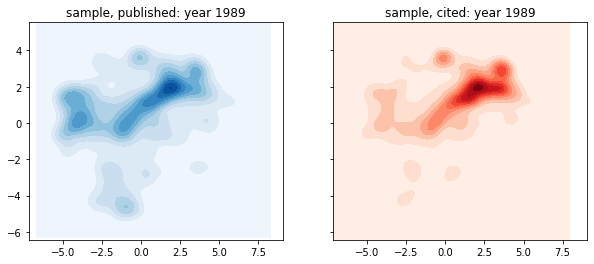

In [11]:
# transform the sample publications and citations

um_pubs = umap_model.transform(P_embeddings)
um_cites = umap_model.transform(C_embeddings)

# plot
(f, ax) = plt.subplots(1,
                       2,
                       sharex='all', sharey='all',
                       figsize=(10,4))

sns.kdeplot(um_pubs[:,0], # these are pca'd
            um_pubs[:,1],
            ax=ax[0],
            shade=True,
            cmap='Blues')
ax[0].set_title('sample, published: year {}'.format(year))


sns.kdeplot(um_cites[:,0], # these are pca'd
            um_cites[:,1],
            ax=ax[1],
            shade=True,
            cmap='Reds')
ax[1].set_title('sample, cited: year {}'.format(year))
